# Predicting Stock Prices with Linear Regression

## Recap
![Alt mindmap](https://s3-eu-west-1.amazonaws.com/gallery-prod-4f50/img/a897779b107f4e8a818316dc40f3d25a.png)
[**click here for more details**](https://sketchboard.me/RBiXS3ZIZyOe)

## Part 1: Overfitting and Underfitting

In this part we are building a polynomial linear regression model and demonstrating the problems of overfitting and underfitting.

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Import the dataset overfitting_underfitting_dataset.csv
data = pd.read_csv('./overfitting_underfitting_dataset.csv')
data.head()

,X,Y
0,-5.000000,-38.072172
1,-4.907407,-26.810358
2,-4.691358,-23.012746
3,-4.629630,-17.362182
4,-4.382716,-24.947186


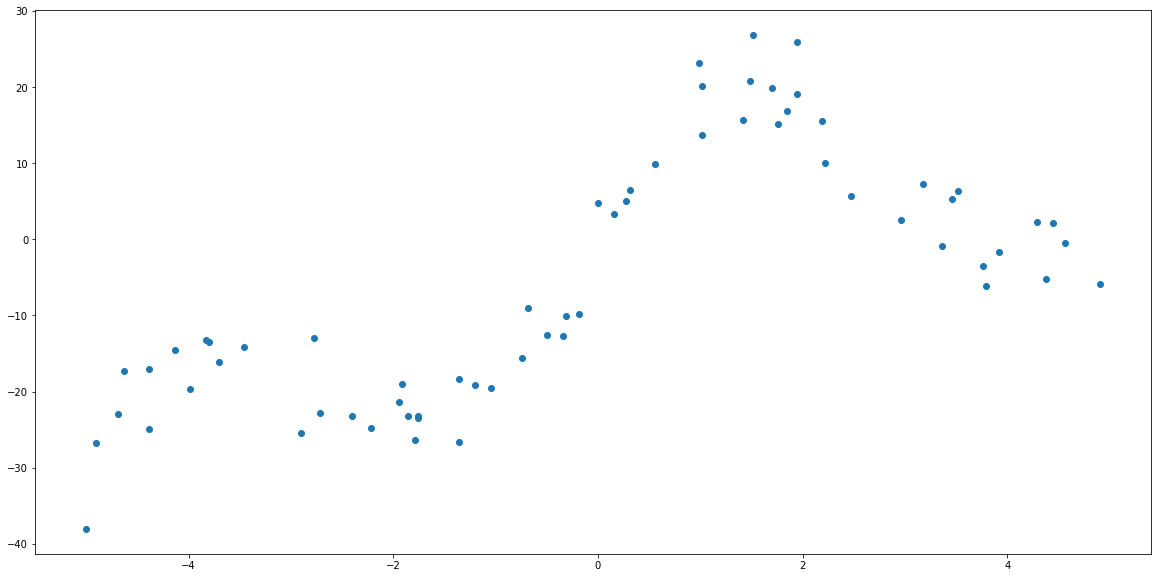

In [ ]:
# Let's plot the dataset using plt.scatter()
plt.figure(figsize=(20, 10))

# Your code here
plt.scatter(data.X, data.Y)

plt.show()

#### Train/Test split

[More in detail](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [ ]:
# New technic: train_test_split splits arrays or matrices into random train and test subsets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['X']], data['Y'], test_size=0.3, random_state=68)
# Notice that we use [['X']] and ['Y'] here. Any idea why?

# We sort the training set in order to keep the curve-form when we plot it on a graph using plt.plot()
X_train = X_train.sort_index()
y_train = y_train.sort_index()

ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [ ]:
# Let's plot the training set AND test set on a graph using plt.scatter()

plt.figure(figsize=(20, 10))

# Your code here
plt.figure(figsize=(20, 10))
plt.scatter(X_train['X'], y_train)
plt.scatter(X_test['X'], y_test)

plt.show()

### Building Polynomial Linear Regression

In [ ]:
# Refer to the example we did on Lecture section, let's build a polynomial linear regression model and train it
# Step 1: import LinearRegression and PolynomialFeatures
# Your code here
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Step 2: Define a instance of LinearRegression called 'lm'
# Your code here
lm = LinearRegression()

# Step 3: Define a instance of PolynomialFeatures with degree=4 called 'poly_reg'
# Your code here
poly_reg = PolynomialFeatures(degree = 4)

# Step 3: Fit and transform 'X_train', 'X_test' with the PolynomialFeatures and save the result in 'X_train_poly' and 'X_test_poly'
# Your code here
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.fit_transform(X_test)

# Step 4: Fitting the Linear Regression Model to the training set (X_train_poly)
# Your code here
lm.fit(X_train_poly, y_train)

# Step 5: Run predict() on the training set and save the result in 'y_train_predict' in order to plot your model
# Your code here
y_train_predict = lm.predict(X_train_poly)

# Step 6: Predict test set and save the result in 'y_test_predict'
# Your code here
y_test_predict = lm.predict(X_test_poly)


In [ ]:
# Now if you did everything correctly this code below should be able to visualize the result
plt.figure(figsize=(20, 10))
plt.plot(X_train, y_train_predict)
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.show()

NameError: name 'X_train' is not defined

<Figure size 1440x720 with 0 Axes>

### Overfitting & Underfitting demonstration

In [ ]:
# Now let's write a function do the same thing we did in previous step but with degree as a argument
def plot_poly_linear_regression(degree=10):
    # Your code here
    # Hint: copy the code that you did in previous step here 
    lm = LinearRegression()
    poly_reg = PolynomialFeatures(degree = degree)
    
    
    X_train_poly = poly_reg.fit_transform(X_train)
    X_test_poly = poly_reg.fit_transform(X_test)

    lm.fit(X_train_poly, y_train)

    y_train_predict = lm.predict(X_train_poly)
    y_test_predict = lm.predict(X_test_poly)

    # calculate the residual errors 
    train_error = np.sqrt(np.mean(np.square(y_train_predict - y_train)))
    test_error = np.sqrt(np.mean(np.square(y_test_predict - y_test)))
                          
    # Visualization
    plt.figure(figsize=(20, 10))
    plt.scatter(X_train, y_train, label='Train')
    plt.scatter(X_test, y_test, label='Test')
    
    X_train_2 = np.linspace(X_train.min(), X_train.max(), 100)
    plt.plot(X_train_2, lm.predict(poly_reg.fit_transform(X_train_2.reshape(-1, 1))), label='Predict')
    plt.title('Train error: {:.3f}\nTest error: {:.3f}\n'.format(train_error, test_error))
    plt.legend(loc="best")
    plt.show()

In [ ]:
# This code below uses your function above to demo a interative graph which allows us to tune the parameter 'degree'
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

In [ ]:
p = interactive(plot_poly_linear_regression, degree=(1, 20, 1))
display(p)

interactive(children=(IntSlider(value=10, description='degree', max=20, min=1), Output()), _dom_classes=('widg…

![Imgur](https://i.imgur.com/tfyFZB7.png)

In general, the training error decreases as we add complexity to our model with additional features or more complex prediction mechanisms (increase degree). The test error, on the other hand, decreases up to a certain amount of complexity then increases again as the model overfits the training set. 


## Part 2: Working on VinGroup's stock prices

### Data Description

The dataset is about the stock prices of Vingroup from Jan 3rd 2017 to Oct 9th 2018. 

 - **DATE**: Trading date, or trading session.
 - **OPEN**: Daily opening price, the price of the first trade within each trading day.
 - **CLOSE**: Daily close price, the price at the end of trading day.
 - **HIGH**: The highest price at which a stock traded within a day. 
 - **LOW**: The lowest price at which a stock traded within a day.
 - **VOLUME**: Volume is the number of shares that are traded within a day.
 - **TICKER**: Security code of Vingroup on the market (VIC).
 
**CLOSE** is our target/dependent variable. We are going to build a model to predict the **Close Price**.

**Import mdates from matplotlib**

In [ ]:
# we need mdates from matplotlib to work with the DATE column
import matplotlib.dates as mdates
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Import stock prices dataset
# Your code here
stock = pd.read_csv('./trading-statistics-VIC.csv')

# Show first 5 rows of the dataset
# Your code here
stock.head()

,DATE,CLOSE,TICKER,OPEN,HIGH,LOW,VOLUME
0,09/10/2018,96.6,VIC,96.6,97.3,96.1,944590.0
1,08/10/2018,96.6,VIC,97.6,98.3,96.4,1766100.0
2,05/10/2018,98.5,VIC,99.9,100.4,98.3,1868060.0
3,04/10/2018,100.6,VIC,102.1,102.2,100.6,635150.0
4,03/10/2018,102.2,VIC,103.0,103.9,101.8,860380.0


In [ ]:
# Using tail() to show last 5 rows 
# Your code here
stock.tail()

,DATE,CLOSE,TICKER,OPEN,HIGH,LOW,VOLUME
435,09/01/2017,43.20,VIC,43.3,43.50,43.20,459010.0
436,06/01/2017,43.10,VIC,42.4,43.50,42.35,850050.0
437,05/01/2017,42.30,VIC,41.9,42.40,41.90,359450.0
438,04/01/2017,42.05,VIC,41.6,42.05,41.60,314110.0
439,03/01/2017,41.60,VIC,42.0,42.00,41.60,321500.0


In [ ]:
# Check unique values of the column TICKER
# Your code here
stock['TICKER'].unique()

array(['VIC'], dtype=object)

We see that the column **TICKER** contains only one value `VIC` and doesn't give us any information about the **CLOSE** prices. So we will entirely remove the column **TICKER**.

In [ ]:
# Using drop() with axis=1 to remove the column TICKER out of our dataset
# Your code here
stock = stock.drop(columns=['TICKER'])
# stock.drop('TICKER', axis=1)

stock.head()

,DATE,CLOSE,OPEN,HIGH,LOW,VOLUME
0,09/10/2018,96.6,96.6,97.3,96.1,944590.0
1,08/10/2018,96.6,97.6,98.3,96.4,1766100.0
2,05/10/2018,98.5,99.9,100.4,98.3,1868060.0
3,04/10/2018,100.6,102.1,102.2,100.6,635150.0
4,03/10/2018,102.2,103.0,103.9,101.8,860380.0


In [ ]:
# Using info() to show overview informations
# Your code here
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
DATE      440 non-null object
CLOSE     440 non-null float64
OPEN      440 non-null float64
HIGH      440 non-null float64
LOW       440 non-null float64
VOLUME    440 non-null float64
dtypes: float64(5), object(1)
memory usage: 20.7+ KB


**DATE** column is considered as `Object`. `Object` is generic data type encapsulates everything from `string` to `integer`, etc. So we need to convert **DATE** to `Datetime` and then using `mdates.data2num()` to convert `Datetime` into `number`. This is because computers process numbers and eventually do math operations on features.

In [ ]:
# Read and understand this code below. New technic here are the Lambda function and 'apply()'
stock['DATE'] = pd.to_datetime(stock['DATE'], format='%d/%m/%Y')
stock['DATE2NUM'] = stock['DATE'].apply(lambda x: mdates.date2num(x))

In [ ]:
# Let's check again using the function info()
# Your code here
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 7 columns):
DATE        440 non-null datetime64[ns]
CLOSE       440 non-null float64
OPEN        440 non-null float64
HIGH        440 non-null float64
LOW         440 non-null float64
VOLUME      440 non-null float64
DATE2NUM    440 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 24.1 KB


In [ ]:
# Let's take a look at the new column using the function head()
# Your code here
stock.head()

,DATE,CLOSE,OPEN,HIGH,LOW,VOLUME,DATE2NUM
0,2018-10-09,96.6,96.6,97.3,96.1,944590.0,736976.0
1,2018-10-08,96.6,97.6,98.3,96.4,1766100.0,736975.0
2,2018-10-05,98.5,99.9,100.4,98.3,1868060.0,736972.0
3,2018-10-04,100.6,102.1,102.2,100.6,635150.0,736971.0
4,2018-10-03,102.2,103.0,103.9,101.8,860380.0,736970.0


Now let's see how our stock data looks like. 

/Users/chrisle/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


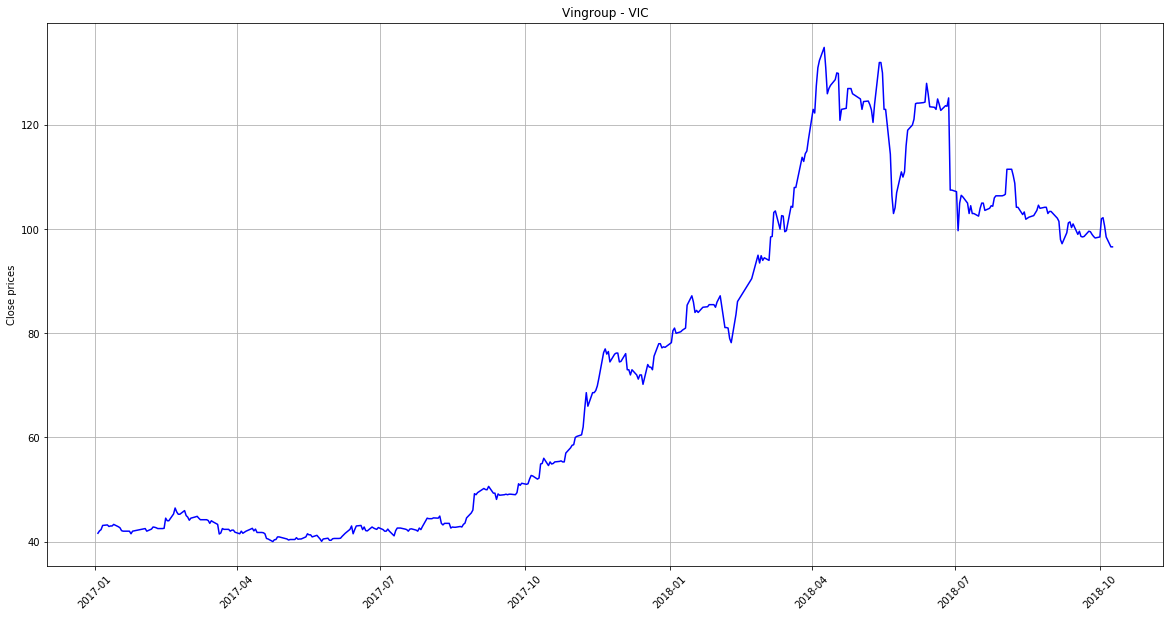

In [ ]:
# Run this code below
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
plt.plot_date(stock['DATE'], stock['CLOSE'], fmt='b-', xdate=True, ydate=False, label='Real value')
plt.ylabel('Close prices')
plt.title('Vingroup - VIC')
plt.grid()
plt.show()

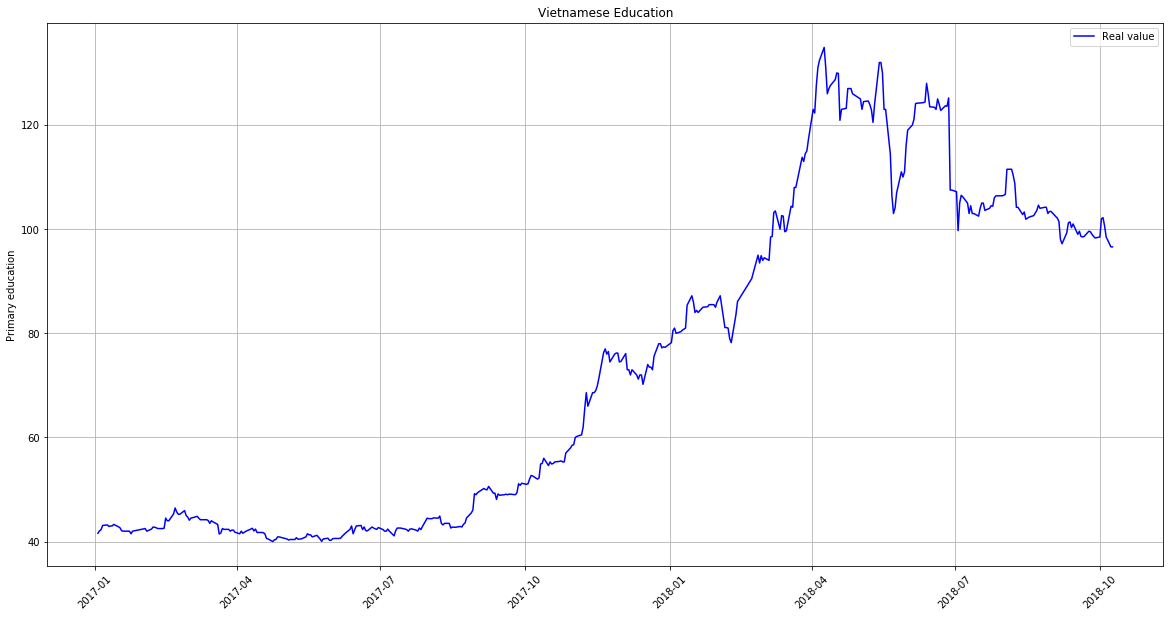

In [ ]:
# Your job is now to put the code above into a method that we can reuse later on
# The method takes the first argument as datatype date (e.g. stock['DATE'])
# The second argument should be a vector of close prices (e.g. stock['CLOSE'])
# Then the third argument is optional and represents predicted prices of our model
# Noted that all of the arguments should have the same length
def plot_stock(date, outcome, prediction=None):
    # your code here
    plt.figure(figsize=(20,10))
    plt.xticks(rotation=45)
    plt.plot_date(date, outcome, fmt='b-', xdate=True, ydate=False, label='Real value')
    if prediction is not None:
        plt.plot_date(date, prediction, fmt='r-', xdate=True, ydate=False, label='prediction')
    plt.ylabel('Primary education')
    plt.title('Vietnamese Education')
    plt.legend()
    plt.grid()
    plt.show()
    return
    
# The result should be the same graph from the previous step
plot_stock(stock['DATE'],stock['CLOSE'])

### Train/Test split

In [ ]:
import numpy as np
# Assign the CLOSE column to the variable y
# Your code here
y = stock['CLOSE']

# Assign ['DATE2NUM'] to the variable X
# Your code here
X = stock[['DATE2NUM', 'OPEN']]


# This dataset is called time series dataset. Because the observations (rows) follow each other by the date.
# So we can't use train_test_split in this case.
# First, we get the number of rows and columns of the dataset
nrow , ncol = stock.shape

# Then using loc to split the dataset into a training set and a test set
X_test = X.loc[:np.floor(nrow*0.3)]
X_train = X.loc[np.floor(nrow*0.3):]

# print('nrow: ', nrow)
# print('nrow*0.3', nrow*0.33)
# print('result: ', np.floor(nrow*0.33))

# Do the same with the outcome y
# your code here
y_test = y.loc[:np.floor(nrow*0.3)]
y_train = y.loc[np.floor(nrow*0.3):]

# To visualize the training set and test set, we need to split the DATE column into 2 parts too
# Your code here
date_test = stock[['DATE']].loc[:np.floor(nrow*0.3)]
date_train = stock[['DATE']].loc[np.floor(nrow*0.3):]

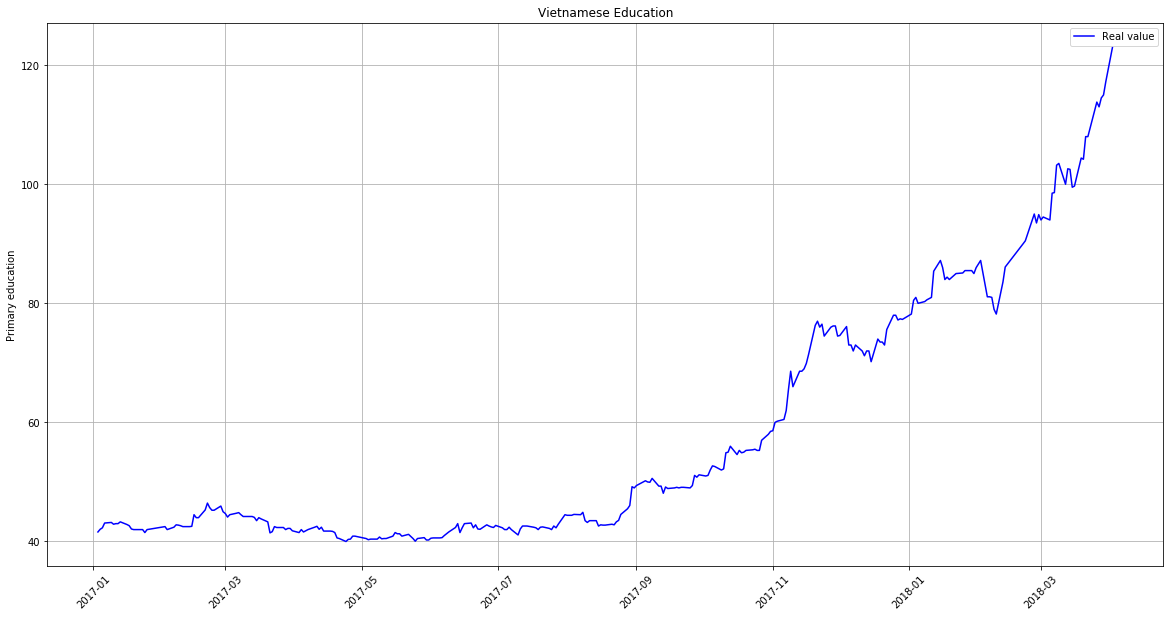

In [ ]:
# If you do everything correctly your function should be able to plot the training set and test set here
# Plot of training set
plot_stock(date_train, y_train)

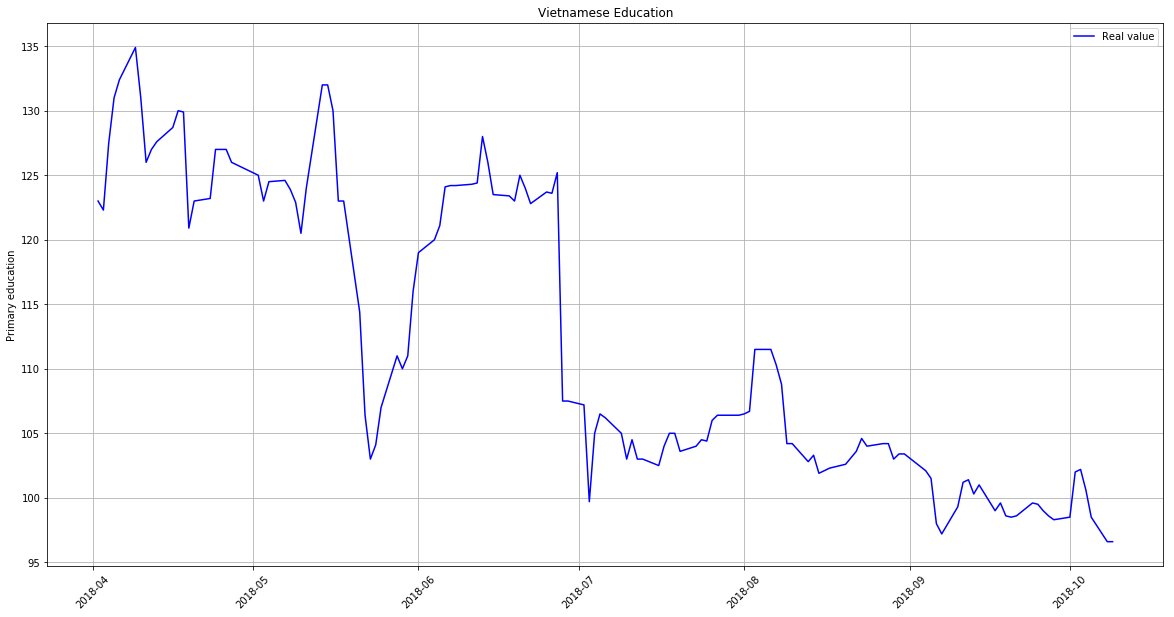

In [ ]:
# Plot of training set
plot_stock(date_test, y_test)

### Training Linear Regression Model

In [ ]:
# Let's import Linear Regression from the sci-kit learn library and train your model with X_train, y_train
# Notice that we use (date_train, y_train) to plot and (X_train, y_train) to train the model
# Your code here
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

# If everything fine, you should be able to print out the coefficients (b1, b2, .. bn) and the intercept (b0)
print(lm.coef_)
print(lm.intercept_)

[0.0019533  0.99962713]
-1438.4920823817376


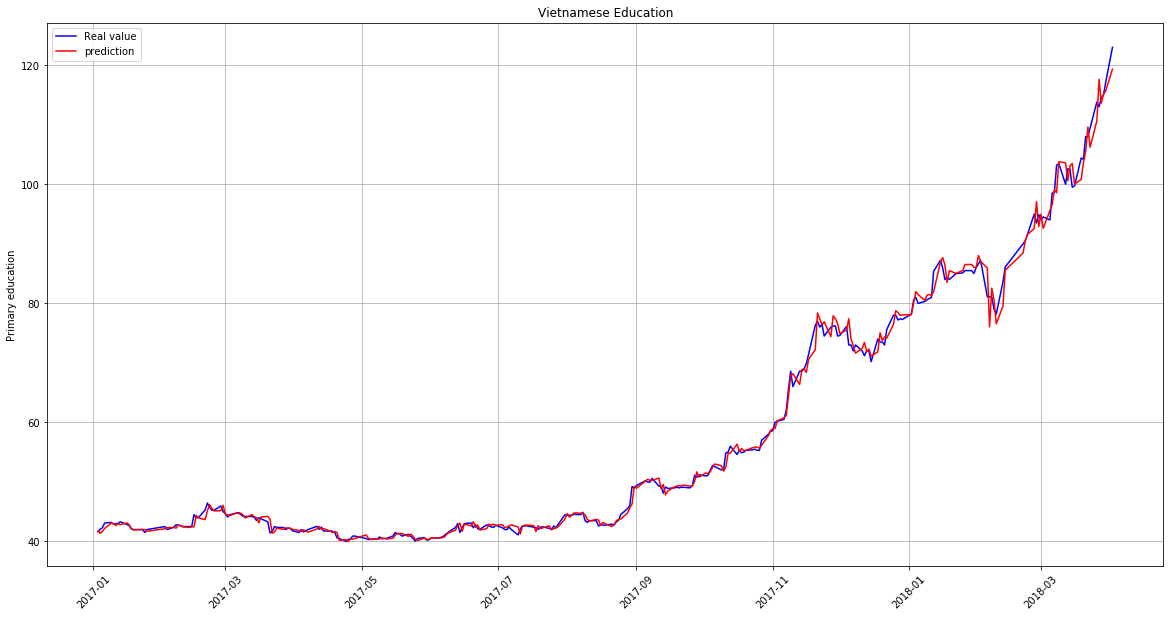

In [ ]:
# Now we have a Linear Regression model. Let's use function predict() on X_train and save the result in predictions_train
# Your code here
predictions_train = lm.predict(X_train)
# Call your plot_stock() function to compare our model's curve with y_train
plot_stock(date_train, y_train, predictions_train)

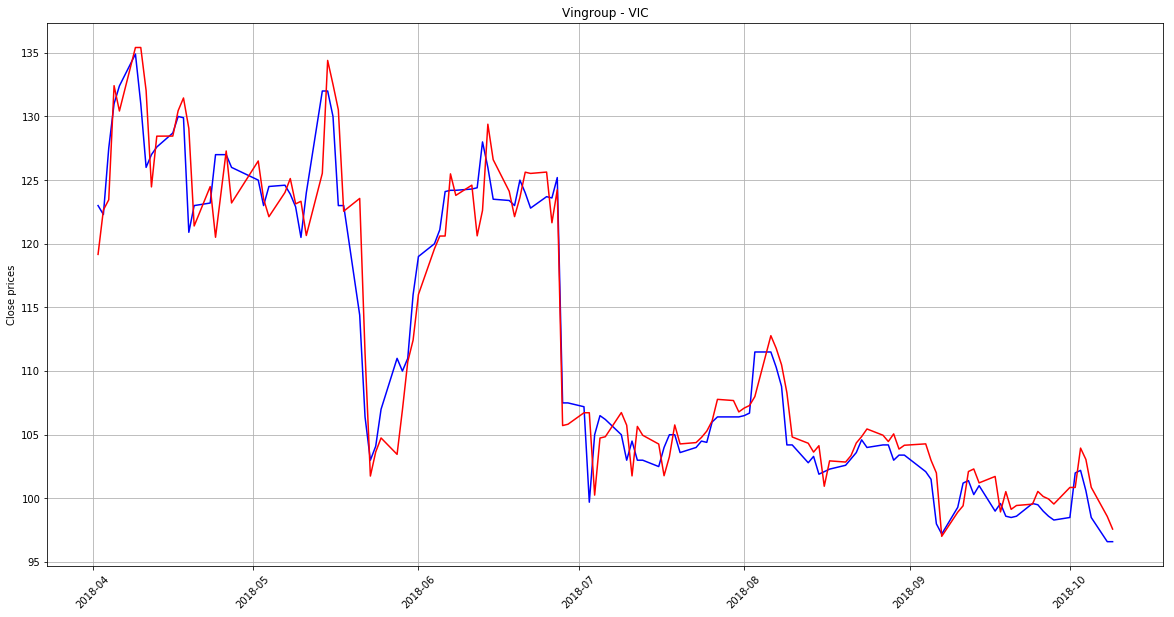

In [ ]:
# Now let see how your model predicts the test set. Save the result in a variable called 'predictions_test'
# Your code here
predictions_test = lm.predict(X_test)

# Call your plot_stock() function to compare the result with y_test
plot_stock(date_test, y_test, predictions_test)

Not a good result as expected? Do you have any idea why?

Let's go back to the splitting data step and add more features to your training set. Let's see how that could improve your model.

## Great job! Hope you enjoy it.